# test_d23b.ipynb
Test the functions contained in d23b.py.

Author: Benjamin S. Grandey, 2023

In [1]:
import d23b
import matplotlib.pyplot as plt

In [2]:
# Matplotlib settings
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['savefig.dpi'] = 300

## Marginals of ice-sheet component projections

In [3]:
%%time
d23b.read_sea_level_qf(projection_source='fusion', component='WAIS', scenario='SSP5-8.5', year=2100)

read_sea_level_qf('ISMIP6', 'WAIS', 'SSP5-8.5', 2100): including PEN in WAIS.
CPU times: user 667 ms, sys: 99.5 ms, total: 766 ms
Wall time: 892 ms


<xarray.DataArray (quantiles: 107)>
array([-5.42000055e-01, -3.78426008e-01, -2.56080016e-01, -1.98000005e-01,
       -1.48360012e-01, -1.13600003e-01, -7.89600059e-02, -5.12000032e-02,
       -2.96000015e-02, -1.48800007e-02, -5.00000035e-03, -2.00000009e-03,
        0.00000000e+00,  2.00000009e-03,  4.00000019e-03,  8.00000038e-03,
        9.00000054e-03,  1.20000010e-02,  1.40000004e-02,  1.60000008e-02,
        1.60000008e-02,  1.90000013e-02,  2.10000016e-02,  2.20000017e-02,
        2.50000022e-02,  2.60000024e-02,  2.80000009e-02,  3.00000012e-02,
        3.10000014e-02,  3.20000015e-02,  3.50000001e-02,  3.60000022e-02,
        3.70000005e-02,  3.90000008e-02,  4.10000011e-02,  4.19999994e-02,
        4.30000015e-02,  4.50000018e-02,  4.70000021e-02,  4.80000041e-02,
        4.90000024e-02,  5.10000028e-02,  5.30000031e-02,  5.40000014e-02,
        5.60000055e-02,  5.70000038e-02,  5.80000021e-02,  5.90000041e-02,
        6.10000007e-02,  6.20000027e-02,  6.30000010e-02,  6.40000030e-02,
        6.70000017e-02,  6.80000037e-02,  7.13600057e-02,  7.58800024e-02,
        7.96800043e-02,  8.36400002e-02,  8.78000021e-02,  9.31600058e-02,
        9.78600012e-02,  1.03120004e-01,  1.08160005e-01,  1.14200002e-01,
        1.19620006e-01,  1.25960009e-01,  1.32880009e-01,  1.40320002e-01,
        1.47300009e-01,  1.55880009e-01,  1.63440011e-01,  1.71560013e-01,
        1.79640010e-01,  1.88000017e-01,  1.98220014e-01,  2.06680015e-01,
        2.16300001e-01,  2.26280011e-01,  2.37000015e-01,  2.48040007e-01,
        2.59440019e-01,  2.73200020e-01,  2.85160020e-01,  2.97600016e-01,
        3.11160010e-01,  3.23000021e-01,  3.38440015e-01,  3.43108020e-01,
        3.58000021e-01,  3.75400019e-01,  3.95000000e-01,  4.22260018e-01,
        4.52480018e-01,  4.85000041e-01,  5.22000027e-01,  5.69220040e-01,
        6.24120030e-01,  6.84920014e-01,  7.65840033e-01,  8.47900023e-01,
        9.16040061e-01,  1.10008004e+00,  1.36028004e+00,  1.63016004e+00,
        1.87261006e+00,  2.02552604e+00,  2.20900011e+00])
Coordinates:
    years      int32 2100
  * quantiles  (quantiles) float64 0.0 0.001 0.005 0.01 ... 0.99 0.995 0.999 1.0
Attributes:
    units:    m

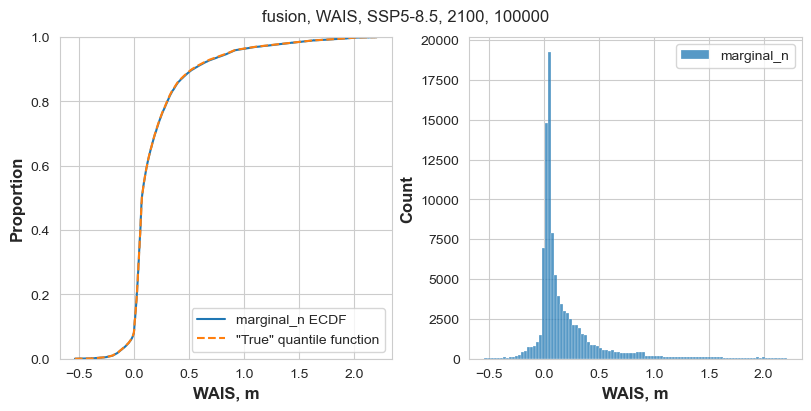

CPU times: user 2.18 s, sys: 634 ms, total: 2.82 s
Wall time: 1.13 s


array([0.02746721, 0.04167583, 0.29432265, ..., 0.03945476, 0.27346924,
       0.02800738])

In [4]:
%%time
d23b.sample_sea_level_marginal(projection_source='fusion', component='WAIS', scenario='SSP5-8.5', year=2100,
                               n_samples=int(1e5), plot=True)

CPU times: user 4.1 s, sys: 849 ms, total: 4.94 s
Wall time: 1.52 s


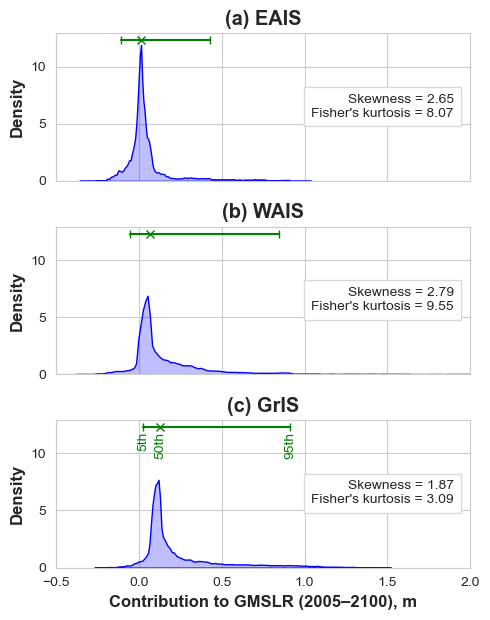

In [5]:
%%time
_ = d23b.fig_ice_sheet_marginals(projection_source='fusion', scenario='SSP5-8.5', year=2100,
                                 components=('EAIS', 'WAIS', 'GrIS'), n_samples=int(1e5))

## Combined Antarctic ISM ensemble

In [6]:
%%time
p21_l23_df = d23b.read_p21_l23_ism_data(ref_year=2015, target_year=2100)
p21_l23_df

CPU times: user 20 s, sys: 1.94 s, total: 21.9 s
Wall time: 23.4 s


,WAIS,EAIS,Group,Notes
0,0.029648,0.023720,P21_ISMIP6,AWI_PISM1
1,-0.022744,-0.010322,P21_ISMIP6,NCAR_CISM
2,-0.007252,0.020039,P21_ISMIP6,AWI_PISM1
3,-0.078800,-0.027450,P21_ISMIP6,NCAR_CISM
4,-0.013104,0.043617,P21_ISMIP6,AWI_PISM1
...,...,...,...,...
65,0.126400,0.303400,L23_MICI,CMIP6_BC_1850-2100 MRI-ESM2-0
66,0.084500,0.079700,L23_MICI,CMIP6_BC_1850-2100 NESM3
67,0.050000,0.044100,L23_MICI,CMIP6_BC_1850-2100 NorESM2-LM
68,0.075000,0.067500,L23_MICI,CMIP6_BC_1850-2100 NorESM2-MM


CPU times: user 186 ms, sys: 53.6 ms, total: 240 ms
Wall time: 63.4 ms


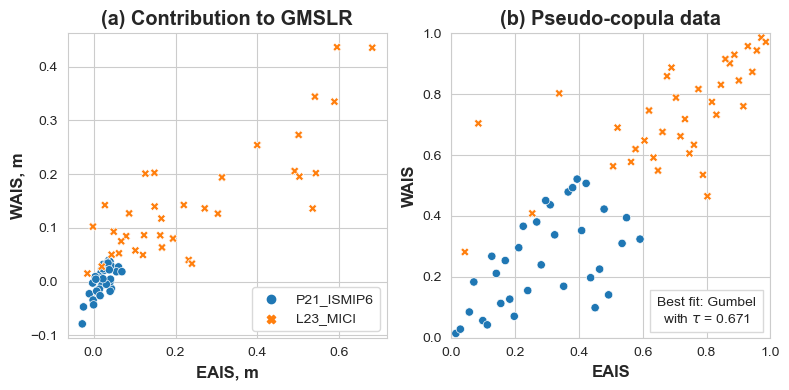

In [7]:
%%time
_ = d23b.fig_p21_l23_ism_data(ref_year=2015, target_year=2100)

## Print versions of packages used by d23b.py

In [8]:
import numpy as np
import pandas as pd
import pyvinecopulib as pv
from scipy import stats
import seaborn as sns
import xarray as xr

In [9]:
%load_ext watermark
%watermark -v --iversions

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.13.1

numpy        : 1.24.3
pyvinecopulib: 0.6.3
matplotlib   : 3.7.1
seaborn      : 0.12.2
pandas       : 2.0.1
xarray       : 2023.4.2
scipy        : 1.10.1



In [10]:
! date

Mon May  8 17:15:19 +08 2023
